In [51]:

# This file contains different methods for finding Eulerian circuits in connected undirected NetworkX Graphs. 
# A graph is considered Eulerian if it contains an Eulerian Path and is one connected component. An eulerian path is a closed walk which 
# visits every edge in the graph once and starts and ends on the same vertex. The functions below determine whether a graph is Eulerian and 
# then find an Eulerian path, if one exists. A graph can be determined as being Eulerian if it is one connected component and 
# all its vertices are of even degree. I have also included a function to check whether a graph is connected. 

###########################################

# Eulerian_circuit_1 finds an Eulerian Circuit by creating list of vertices from the NetworkX Graph and removing them as seen. 

# Eulerian_circuit_2 finds an Eulerian Circuit by using an adjacency matrix to dtermine whether edges have been seen already.

# Eulerian_circuit_3 finds an Eulerian circuit by creating a stack of unseen neighbours and popping them from the queue to form a circuit. 

# all_positive_degree_vertices_connected checks to see if all vertices of positive degree are connected, using a Breath-first traversal. 

###########################################
# Import necessary libaries: 

import networkx as nx
import numpy as np
from collections import deque

###########################################

def Eulerian_circuit_1(G):

    """
    Parameters
    ------------
    G - a connected networkx graph 
    
    Returns
    ------------
    circuit - a list of nodes in the graph which dictate an Eulerian circuit 

    """

    if not nx.is_eulerian(G):          
        return None 

    u = 0                            
    stack = [u]                             # Initialise a stack of vertices
    circuit = []                            # Initialise an output circuit

    while stack:                            # While the stack is not empty 
        current_vertex = stack[-1]          # Call the last element in the stack current_vertex
        F = list(G.edges(current_vertex))   # To avoid using a for - loop, create a list of vertices and remove from them as they have been 'seen'  
        if F:                               # If there are still edges to be checked 
            e = F[-1]                       # Pick the first element in the list of unchecked vertices
            G.remove_edge(e[0],e[1])        # Remove this edge from the graph                         
            stack.append(e[1])              # Add the neighbours of the vertex to the stack to be considered

        else:                               # If there are no more vertices which havent been considered
            current_vertex = stack.pop()    # Pop from the stack 
            circuit.append(current_vertex)  # and add to the circuit 
             
    return circuit


###########################################


def Eulerian_circuit_2(G):

    """
    Parameters
    ------------
    G - a connected networkx graph 
    
    Returns
    ------------
    circuit - a list of nodes in the graph which dictate an Eulerian circuit 

    """

    if not nx.is_eulerian(G):                          # Check the graph is Eulerian  
         print(f"This graph is not Eulerian" )     
         return None

    stack = [0]                                        # Initialise the stack 
    circuit = []                                       # initialise the circuit, empty at first
    F = np.array(nx.adjacency_matrix(G).todense())     # Establish a matrix representation of the graph G 
    
    while stack:                                       # While the stack is not empty 
        
        current_vertex = stack[-1]                     # Check the vertex at the end of           
        
        if  (F[current_vertex]).any() == 1:            # If the node has any vertices not considered
            edge = np.nonzero(F[current_vertex])[0][0] # Pick a neighbour not yet considered
            F[current_vertex][edge] = 0                # Set to 0, meaning seen  
            F[edge][current_vertex] = 0                # Do the same to the mirror vertex 
            stack.append(edge)                         # Add the edge to the stack 
          
        else:                                          # If there are no more vertices which havent been considered
            current_vertex = stack.pop()               # Pop from the stack 
            circuit.append(current_vertex)             # and add to the circuit 
             
    return circuit


###########################################

def Eulerian_circuit_3(G):

    """
    Parameters
    ------------
    G - a connected networkx graph 
    
    Returns
    ------------
    circuit - a list of nodes in the graph which dictate an Eulerian circuit 

    """

    if not nx.is_eulerian(G):          
        return None
    
    u = 0                            
    stack = [u]                                  # Initialise data  
    seen = []
    circuit = []

    while stack:                                 # While the stack is not empty 
    
        current_vertex = stack[-1]
        T = [(current_vertex,neighbour) for neighbour in G[current_vertex] if {current_vertex,neighbour} not in seen]
        if T:                                    # If there are neighbours which haven't been seen 
            edge = T[0]                          # Take first edge we haven't seen 
            seen.append(set(edge))               # Mark these as seen, using sets to negate direction  
            stack.append(edge[1])                # Append edge to the stack 

        else:
            current_vertex = stack.pop()   
            circuit.append(current_vertex)
            
    return circuit

###########################################


def all_positive_degree_vertices_connected(G):      

    """
    Parameters
    ------------
    G - a networkx graph 
    
    Returns
    ------------
    A bool value: True if the graph is connected, False if not

    """
    pos_deg = [i for i in G if len(list(G[i])) > 0]  # Create a list of the positive degree vertices 

    u = pos_deg[0]                                   # Initialise data for breadth-traversal 
    queue = deque()
    queue.append(u)
    seen = set()
    while queue:                                     # While there are still things in the queue
        current_vertex = queue.popleft()             # Get the first thing in the queue

        if current_vertex not in seen:
            seen.add(current_vertex)
            queue.extend(G[current_vertex])          # Add all of the neighbours of current_vertex to the end of the queue.
     
    if len(seen) == len(pos_deg):                    #  
                
        return True
    else:  
        return False

###########################################



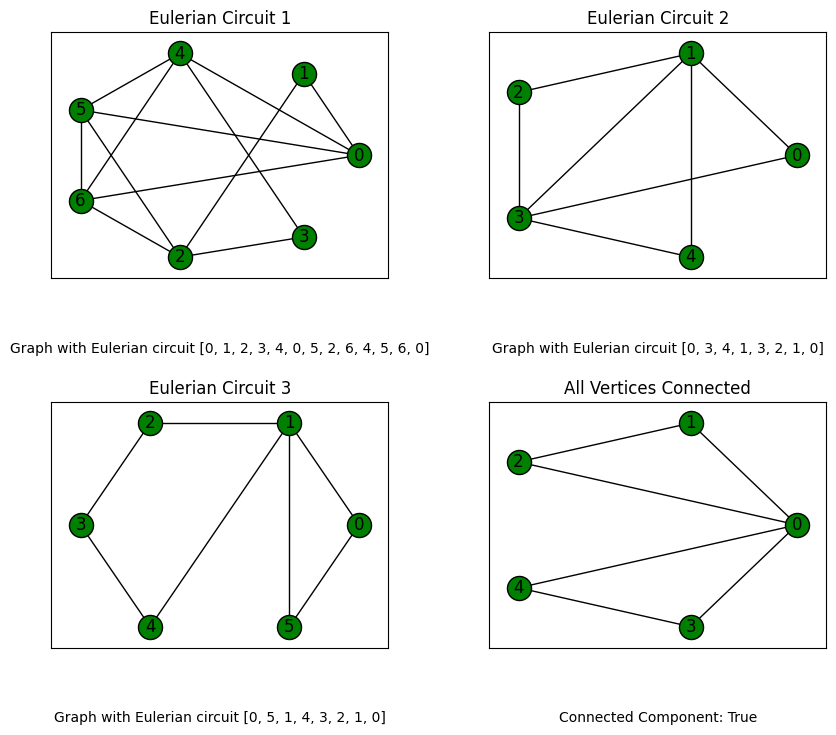

In [52]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

G1 = nx.Graph([{0,1},{0,4},{0,5},{0,6},{1,2},{2,6},{2,3},{2,5},{3,4},{4,5},{4,6},{5,6}])
G2 = nx.Graph([{0, 1}, {1, 2}, {2, 3}, {3, 4}, {4, 1}, {1, 3}, {0, 3}])
G3 = nx.Graph([{0,1},{1,2},{2,3},{3,4},{4,1},{1,5},{5,0}])
G4 = nx.Graph([{0, 1}, {1, 2},{0,2},{0,4},{0,3},{3,4}])

nx.draw_networkx(G1, ax=axs[0, 0], pos=nx.circular_layout(G1), node_color="g", edgecolors="k")
nx.draw_networkx(G2, ax=axs[0, 1],pos=nx.circular_layout(G2), node_color="g", edgecolors="k")
nx.draw_networkx(G3, ax=axs[1, 0],pos=nx.circular_layout(G3), node_color="g", edgecolors="k")
nx.draw_networkx(G4, ax=axs[1, 1],pos=nx.circular_layout(G4), node_color="g", edgecolors="k")

axs[0, 0].set_title('Eulerian Circuit 1')
axs[0, 1].set_title('Eulerian Circuit 2')
axs[1, 0].set_title('Eulerian Circuit 3')
axs[1, 1].set_title('All Vertices Connected')


descriptions = [
    (f'Graph with Eulerian circuit {Eulerian_circuit_1(G1)}'),
    (f'Graph with Eulerian circuit {Eulerian_circuit_2(G2)}'),
    (f'Graph with Eulerian circuit {Eulerian_circuit_3(G3)}'),
    (f'Connected Component: {all_positive_degree_vertices_connected(G4)}')]

for i, ax in enumerate(axs.flatten()):
    ax.text(0.5, -0.3, descriptions[i], transform=ax.transAxes, ha='center', fontsize=10, wrap=True)
    ax.axis('on')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()
